In [ ]:
!pip install wget
!pip install patool
import wget
import patoolib
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import random
import pandas

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=90b1439eb384a31cd761cf2ac7752bf84c1fd2ea922dc36beb2fc44e2dc4454d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 77 kB 3.0 MB/s 


Stahovanie dat

In [ ]:
url = "https://s.ics.upjs.sk/~shorvat/files/data/znacky.rar"
wget.download(url, "znacky.rar")
patoolib.extract_archive("/content/znacky.rar", outdir="/content")

patool: Extracting /content/znacky.rar ...
patool: running /usr/bin/unrar x -- /content/znacky.rar
patool:     with cwd='/content'
patool: ... /content/znacky.rar extracted to `/content'.


'/content'

Priprava dat

In [ ]:
#1-> 1 0 0 0 0 0 0 ...
#2-> 0 1 0 0 0 0 0 ...


data_dir = "/content/znacky/"
names = os.listdir(data_dir)

y1 = np.array([n[0] for n in names])
y2 = np.array([n[1] for n in names])
y3 = np.array([n[2] for n in names])
y4 = np.array([n[3] for n in names])
y5 = np.array([n[4] for n in names])
y6 = np.array([n[5] for n in names])
y7 = np.array([n[6] for n in names])

y11 = np.array([n[0] for n in names])
y12 = np.array([n[1] for n in names])
y13 = np.array([n[2] for n in names])
y14 = np.array([n[3] for n in names])
y15 = np.array([n[4] for n in names])
y16 = np.array([n[5] for n in names])
y17 = np.array([n[6] for n in names])

X = np.array([data_dir+n for n in names])
#X, y ...

setList = list(set(y1))

y1 = y1.tolist()
y2 = y2.tolist()
y3 = y3.tolist()
y4 = y4.tolist()
y5 = y5.tolist()
y6 = y6.tolist()
y7 = y7.tolist()
for i, n in enumerate(y1):  
  y1[i] = setList.index(y1[i])
for i, n in enumerate(y2):  
  y2[i] = setList.index(y2[i])
for i, n in enumerate(y3):  
  y3[i] = setList.index(y3[i])
for i, n in enumerate(y4):  
  y4[i] = setList.index(y4[i])
for i, n in enumerate(y5):  
  y5[i] = setList.index(y5[i])
for i, n in enumerate(y6):  
  y6[i] = setList.index(y6[i])
for i, n in enumerate(y7):  
  y7[i] = setList.index(y7[i])

y11 = y11.tolist()
for i, n in enumerate(y11):  
  if n.isnumeric():
    y11[i] = 1
  else:
    y11[i] = 0

y11 = np.array(y11)

y12 = y12.tolist()
for i, n in enumerate(y12):  
  if n.isnumeric():
    y12[i] = 1
  else:
    y12[i] = 0

y12 = np.array(y12)

y13 = y13.tolist()
for i, n in enumerate(y13):  
  if n.isnumeric():
    y13[i] = 1
  else:
    y13[i] = 0

y13 = np.array(y13)

y14 = y14.tolist()
for i, n in enumerate(y14):  
  if n.isnumeric():
    y14[i] = 1
  else:
    y14[i] = 0

y14 = np.array(y14)

y15 = y15.tolist()
for i, n in enumerate(y15):  
  if n.isnumeric():
    y15[i] = 1
  else:
    y15[i] = 0

y15 = np.array(y15)

y16 = y16.tolist()
for i, n in enumerate(y16):  
  if n.isnumeric():
    y16[i] = 1
  else:
    y16[i] = 0

y16 = np.array(y16)

y17 = y17.tolist()
for i, n in enumerate(y17):  
  if n.isnumeric():
    y17[i] = 1
  else:
    y17[i] = 0

y17 = np.array(y17)


y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)
y6 = np.array(y6)
y7 = np.array(y7)

len(X), len(y1), len(y2), len(y3), len(y4), len(y5), len(y6), len(y7)
len(y11), len(y12), len(y13), len(y14), len(y15), len(y16), len(y17)

(10000, 10000, 10000, 10000, 10000, 10000, 10000)

Priprava znacky

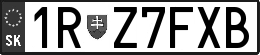

(55, 260)
label: 1 r z 7 f x b


In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(X[0], 0)
cv2_imshow(img.reshape((55,260,1)))
print(np.shape(img))
print("label:", setList[y1[0]], setList[y2[0]], setList[y3[0]], setList[y4[0]], setList[y5[0]], setList[y6[0]], setList[y7[0]])

Generator

In [ ]:
class Plate_generator(tf.keras.utils.Sequence):
    
    def __init__(self, X_path, y1, y2, y3, y4, y5, y6, y7, y11, y12, y13, y14, y15, y16, y17, batch_size):
        
        self.X_path = X_path
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        self.y4 = y4
        self.y5 = y5
        self.y6 = y6
        self.y7 = y7
        self.batch_size = batch_size

        self.y11 = y11
        self.y12 = y12
        self.y13 = y13
        self.y14 = y14
        self.y15 = y15
        self.y16 = y16
        self.y17 = y17

    def __getitem__(self, idx):
        batch_x = self.X_path[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y1 = self.y1[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y2 = self.y2[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y3 = self.y3[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y4 = self.y4[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y5 = self.y5[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y6 = self.y6[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y7 = self.y7[idx*self.batch_size : (idx+1)*self.batch_size]

        batch_y11 = self.y11[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y12 = self.y12[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y13 = self.y13[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y14 = self.y14[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y15 = self.y15[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y16 = self.y16[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y17 = self.y17[idx*self.batch_size : (idx+1)*self.batch_size]


        batch_x = np.array([cv2.imread(i, 0).reshape((55,260,1)) for i in batch_x])
        batch_y1 = to_categorical(batch_y1, num_classes=36)
        batch_y2 = to_categorical(batch_y2, num_classes=36)
        batch_y3 = to_categorical(batch_y3, num_classes=36)
        batch_y4 = to_categorical(batch_y4, num_classes=36)
        batch_y5 = to_categorical(batch_y5, num_classes=36)
        batch_y6 = to_categorical(batch_y6, num_classes=36)
        batch_y7 = to_categorical(batch_y7, num_classes=36)

        batch_y11 = to_categorical(batch_y11, num_classes=2)
        batch_y12 = to_categorical(batch_y12, num_classes=2)
        batch_y13 = to_categorical(batch_y13, num_classes=2)
        batch_y14 = to_categorical(batch_y14, num_classes=2)
        batch_y15 = to_categorical(batch_y15, num_classes=2)
        batch_y16 = to_categorical(batch_y16, num_classes=2)
        batch_y17 = to_categorical(batch_y17, num_classes=2)



        return batch_x, [batch_y1, batch_y2, batch_y3, batch_y4, batch_y5, batch_y6, batch_y7, batch_y11, batch_y12, batch_y13, batch_y14, batch_y15, batch_y16, batch_y17]
    
    def __len__(self):
        return len(self.y1) // self.batch_size


idx = np.arange(len(y1))
random.shuffle(idx)

X = X[idx]
y1 = y1[idx]
y2 = y2[idx]
y3 = y3[idx]
y4 = y4[idx]
y5 = y5[idx]
y6 = y6[idx]
y7 = y7[idx]

y11 = y11[idx]
y12 = y12[idx]
y13 = y13[idx]
y14 = y14[idx]
y15 = y15[idx]
y16 = y16[idx]
y17 = y17[idx]

train_gen = Plate_generator(X_path=X[:730], y1=y1[:730], y2=y2[:730], y3=y3[:730], y4=y4[:730], y5=y5[:730], y6=y6[:730], y7=y7[:730], y11=y11[:730], y12=y12[:730], y13=y13[:730], y14=y14[:730], y15=y15[:730], y16=y16[:730], y17=y17[:730], batch_size=60)
test_gen = Plate_generator(X_path=X[730:], y1=y1[730:], y2=y2[730:], y3=y3[730:], y4=y4[730:], y5=y5[730:], y6=y6[730:], y7=y7[730:], y11=y11[730:], y12=y12[730:], y13=y13[730:], y14=y14[730:], y15=y15[730:], y16=y16[730:], y17=y17[730:], batch_size=60)

In [ ]:
import keras
from keras import layers
from keras.utils.vis_utils import plot_model

inp = layers.Input((55,260,1), name="vstup")
conv = layers.Conv2D(16,(3,3), activation="relu")(inp)
maxp = layers.MaxPool2D(2,2)(conv)
flt = layers.Flatten()(maxp)

char1 = layers.Dense(36, "softmax")(flt)
char2 = layers.Dense(36, "softmax")(flt)
char3 = layers.Dense(36, "softmax")(flt)
char4 = layers.Dense(36, "softmax")(flt)
char5 = layers.Dense(36, "softmax")(flt)
char6 = layers.Dense(36, "softmax")(flt)
char7 = layers.Dense(36, "softmax")(flt)


char11 = layers.Dense(2, "softmax")(flt)
char12 = layers.Dense(2, "softmax")(flt)
char13 = layers.Dense(2, "softmax")(flt)
char14 = layers.Dense(2, "softmax")(flt)
char15 = layers.Dense(2, "softmax")(flt)
char16 = layers.Dense(2, "softmax")(flt)
char17 = layers.Dense(2, "softmax")(flt)

model = keras.Model(inputs = [inp], outputs = [char1, char2, char3, char4, char5, char6, char7, char11, char12, char13, char14, char15, char16, char17])
plot_model(model)

model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
history = model.fit(train_gen, validation_data = test_gen, epochs=15)
model.summary()




Epoch 1/15
12/12 [==============================] - 35s 3s/step - loss: 20678.7324 - dense_loss: 2550.9202 - dense_1_loss: 2440.8516 - dense_2_loss: 2401.5369 - dense_3_loss: 2357.1150 - dense_4_loss: 2819.9248 - dense_5_loss: 2857.7991 - dense_6_loss: 1735.7908 - dense_7_loss: 552.4792 - dense_8_loss: 620.1630 - dense_9_loss: 485.4563 - dense_10_loss: 523.1321 - dense_11_loss: 558.9610 - dense_12_loss: 471.5950 - dense_13_loss: 303.0081 - dense_accuracy: 0.0444 - dense_1_accuracy: 0.0528 - dense_2_accuracy: 0.0486 - dense_3_accuracy: 0.0514 - dense_4_accuracy: 0.0347 - dense_5_accuracy: 0.0444 - dense_6_accuracy: 0.0556 - dense_7_accuracy: 0.5528 - dense_8_accuracy: 0.6722 - dense_9_accuracy: 0.6153 - dense_10_accuracy: 0.5653 - dense_11_accuracy: 0.5861 - dense_12_accuracy: 0.6458 - dense_13_accuracy: 0.6236 - val_loss: 28501.5977 - val_dense_loss: 4179.2461 - val_dense_1_loss: 3704.3433 - val_dense_2_loss: 3833.5576 - val_dense_3_loss: 3726.0754 - val_dense_4_loss: 3912.4570 - val_d

129
zadany vstup: 129


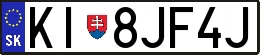

KI8JF4J
5
pismeno


In [ ]:
a = int(input())
print("zadany vstup:", a)
path = X[a]
img = cv2.imread(path,0).reshape((55,260,1))
img_toshow = cv2.imread(path,1)
cv2_imshow(img_toshow)


x = np.array([img])
res=model.predict(x)



znak1 = np.argmax(res[0])
znak2 = np.argmax(res[1])
znak3 = np.argmax(res[2])
znak4 = np.argmax(res[3])
znak5 = np.argmax(res[4])
znak6 = np.argmax(res[5])
znak7 = np.argmax(res[6])

znak11 = np.argmax(res[7])
znak12 = np.argmax(res[8])
znak13 = np.argmax(res[9])
znak14 = np.argmax(res[10])
znak15 = np.argmax(res[11])
znak16 = np.argmax(res[12])
znak17 = np.argmax(res[13])
odpoved = ""
odpoved += setList[znak1].upper() +setList[znak2].upper()+setList[znak3].upper()+setList[znak4].upper()+setList[znak5].upper()+setList[znak6].upper()+setList[znak7].upper()

print(odpoved)
c = int(input())
if c == 1:
  if znak11 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 2:
  if znak12 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 3:
  if znak13 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 4:
  if znak14 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 5:
  if znak15 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 6:
  if znak16 == 1:
    print("cifra")
  else:
    print("pismeno")
if c == 7:
  if znak17 == 1:
    print("cifra")
  else:
    print("pismeno")